In [1]:
%run 1.Functions.ipynb
N = 4
P = number_of_variables(N)

In [2]:
x1 = 0
x2 = 10000
Ideals = []
for i in range(x1,x2):
    with open(path_ideals + 'Ideal{}.pickle'.format(i), 'rb') as handle:
        I = pickle.load(handle)
        Ideals.append(I) 

In [3]:
GB = []
for i in range(x1,x2):
    with open(path_GB + 'GB{}.pickle'.format(i), 'rb') as handle:
        g = pickle.load(handle)
        GB.append(g) 

In [4]:
JB = []
for i in range(x1,x2):
    with open(path_JB + 'JB{}.pickle'.format(i), 'rb') as handle:
        j = pickle.load(handle)
        JB.append(j) 

In [5]:
maxdeg = []
maxterm = []
gens = []
for i in range(10000):
    maxdeg.append([max_deg(Ideals[i]), max_deg(LT_I(GB[i])), max_deg(JB[i])])
    maxterm.append([num_terms(Ideals[i]), num_terms(GB[i]), max_terms(JB[i])])
    gens.append([len(Ideals[i]), len(GB[i]), len(JB[i])])

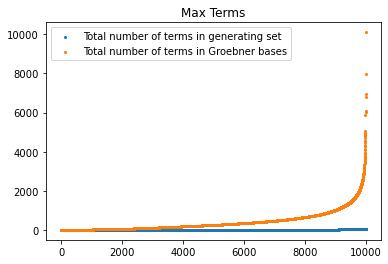

In [31]:
import matplotlib.pyplot as plt

# Extract the three lists of values from the maxterm list
max_terms_Ideals = sorted([x[0] for x in maxterm])
max_terms_GB = sorted([x[1] for x in maxterm])
max_terms_JB = sorted([x[2] for x in maxterm])

# Plot the three lists of values in one figure
fig, ax = plt.subplots()
ax.scatter(range(len(maxdeg)), max_terms_Ideals, label='Total number of terms in generating set' , s = 4)
ax.scatter(range(len(maxdeg)), max_terms_GB, label='Total number of terms in Groebner bases' , s = 4)

# Add a legend and a title
ax.legend()
ax.set_title('Total number of terms')
plt.savefig("MaxtermsGB.png")


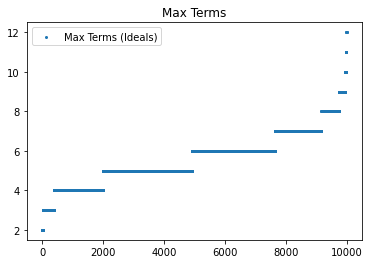

In [8]:
fig, ax = plt.subplots()
ax.scatter(range(len(maxdeg)), max_terms_Ideals, label='Max Terms (Ideals)' , s = 4)


# Add a legend and a title
ax.legend()
ax.set_title('Max Terms')

# Show the plot
plt.savefig("MaxtermsIdeals.png")

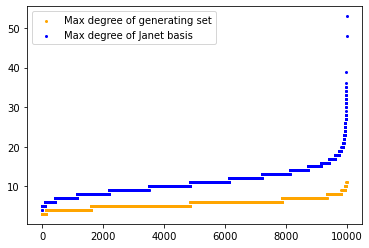

In [14]:
import matplotlib.pyplot as plt

# Extract the three lists of values from the maxterm list
max_deg_Ideals = sorted([x[0] for x in maxdeg])
max_deg_GB = sorted([x[1] for x in maxdeg])
max_deg_JB = sorted([x[2] for x in maxdeg])

# Plot the three lists of values in one figure
fig, ax = plt.subplots()
#plt.yscale("log")
ax.scatter(range(len(maxdeg)), max_deg_Ideals, label='Max degree of generating set', color = 'orange' , s = 4)
ax.scatter(range(len(maxdeg)),max_deg_JB, label='Max degree of Janet basis', color = 'blue', s = 4)
#ax.scatter(range(len(maxdeg)),max_deg_GB, label='Max degree of Groebner Basis', alpha = 0.01, color = 'blue', s = 4)

# Add a legend and a title
ax.legend()
#ax.set_title('Max degrees')

# Show the plot
plt.savefig("MaxdegJB.png")

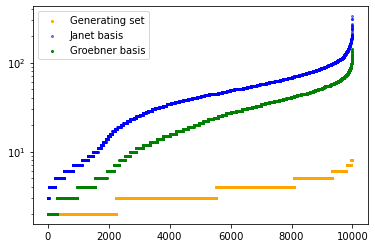

In [12]:
import matplotlib.pyplot as plt

# Extract the three lists of values from the maxterm list
gens = sorted(gens, key=lambda x: x[2]) 
gens_Ideals = sorted([x[0] for x in gens])
gens_GB = sorted([x[1] for x in gens])
gens_JB = sorted([x[2] for x in gens])


# Plot the three lists of values in one figure
fig, ax = plt.subplots()
plt.yscale("log")
ax.scatter(range(len(gens)), gens_Ideals, label='Generating set', color = 'orange', s = 4)
ax.scatter(range(len(gens)),gens_JB, label='Janet basis', alpha = 0.5, color = 'blue', s = 4)
ax.scatter(range(len(gens)),gens_GB, label='Groebner basis', color = 'green', s = 4)

# Add a legend and a title
ax.legend()


# Show the plot
plt.savefig("Number of Generators.png")

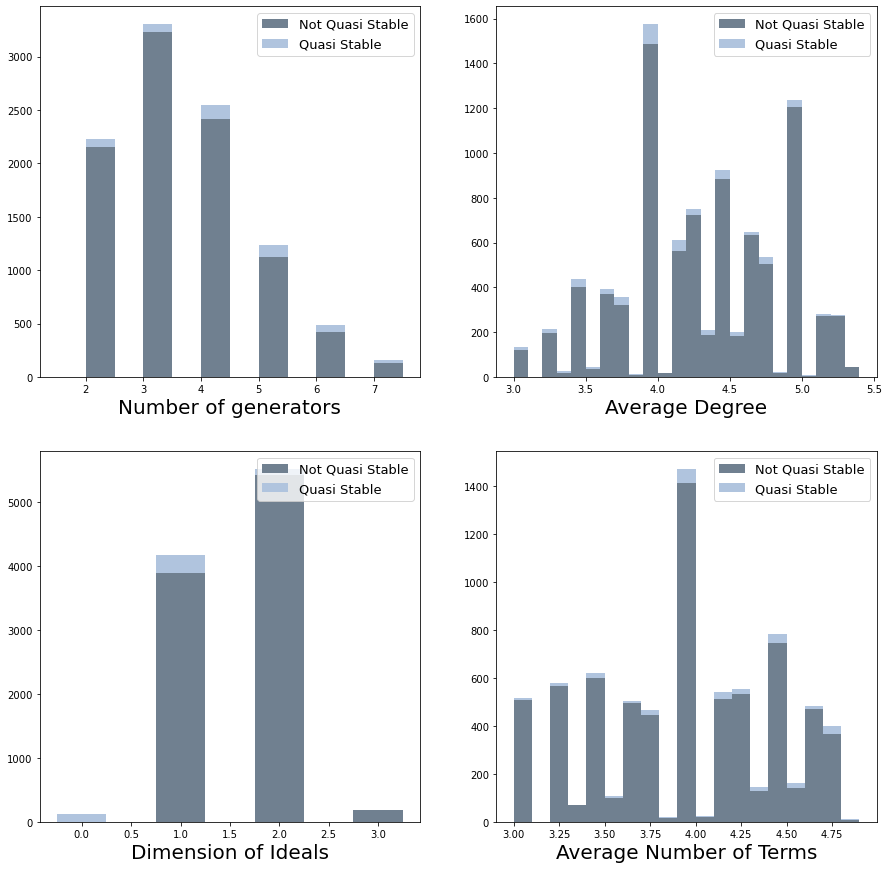

In [9]:
import numpy as np
fig, axs = plt.subplots(2, 2, figsize = (15,15))
axs[0,0].hist([df[df['QS']==1]['#gens'], df[df['QS']==0]['#gens']], stacked=True, bins = np.arange(3/2, 8, 1/2) , label=['Not Quasi Stable','Quasi Stable'], color = ['slategray', 'lightsteelblue'])
axs[0,0].set_xlabel('Number of generators', fontsize=20)
axs[0,0].legend(fontsize=13)

axs[0,1].hist([df[df['QS']==1]['av_deg'], df[df['QS']==0]['av_deg']], stacked=True, bins = np.arange(6/2, 5.5, 1/10), label=['Not Quasi Stable','Quasi Stable'], color = ['slategray', 'lightsteelblue'])
axs[0,1].set_xlabel('Average Degree', fontsize=20)
axs[0,1].legend(fontsize=13)

axs[1,1].hist([df[df['QS']==1]['av_terms'], df[df['QS']==0]['av_terms']], stacked=True, bins = np.arange(6/2, 5, 1/10), label=['Not Quasi Stable','Quasi Stable'], color = ['slategray', 'lightsteelblue'])
axs[1,1].set_xlabel('Average Number of Terms', fontsize=20)
axs[1,1].legend(fontsize=13)

axs[1,0].hist([df[df['QS']==1]['dim'], df[df['QS']==0]['dim']], stacked=True, bins = np.arange(-1/4, 3.5, 1/2), label=['Not Quasi Stable','Quasi Stable'], color = ['slategray', 'lightsteelblue'])
axs[1,0].set_xlabel('Dimension of Ideals', fontsize=20)
axs[1,0].legend(loc = 'upper right', fontsize=13)

#fig.savefig('Statfeatures.png')
#plt.savefig("Statfeatures.svg")
plt.savefig("Statfeatures.pdf", dpi = 1200)